## Diabetes Classification Problem
- Dataset Link : https://www.kaggle.com/johndasilva/diabetes
- Predict weather a person has diabetes or not using the best classification model

In [2]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load data
data = pd.read_csv('kaggle_diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


### Exploratory Data Analysis
- Do all the necessary data exploration and repair the data if necessary

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2000.0,3.70350,3.306063,0.000,1.000,3.000,6.000,17.00
Glucose,2000.0,121.18250,32.068636,0.000,99.000,117.000,141.000,199.00
BloodPressure,2000.0,69.14550,19.188315,0.000,63.500,72.000,80.000,122.00
SkinThickness,2000.0,20.93500,16.103243,0.000,0.000,23.000,32.000,110.00
Insulin,2000.0,80.25400,111.180534,0.000,0.000,40.000,130.000,744.00
BMI,2000.0,32.19300,8.149901,0.000,27.375,32.300,36.800,80.60
DiabetesPedigreeFunction,2000.0,0.47093,0.323553,0.078,0.244,0.376,0.624,2.42
Age,2000.0,33.09050,11.786423,21.000,24.000,29.000,40.000,81.00
Outcome,2000.0,0.34200,0.474498,0.000,0.000,0.000,1.000,1.00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


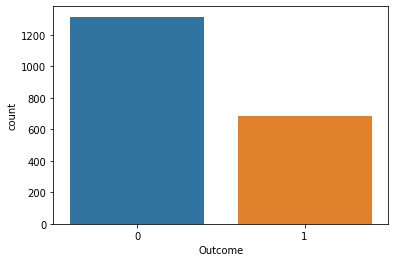

In [13]:
sns.countplot(x = 'Outcome', data = data)
plt.show()

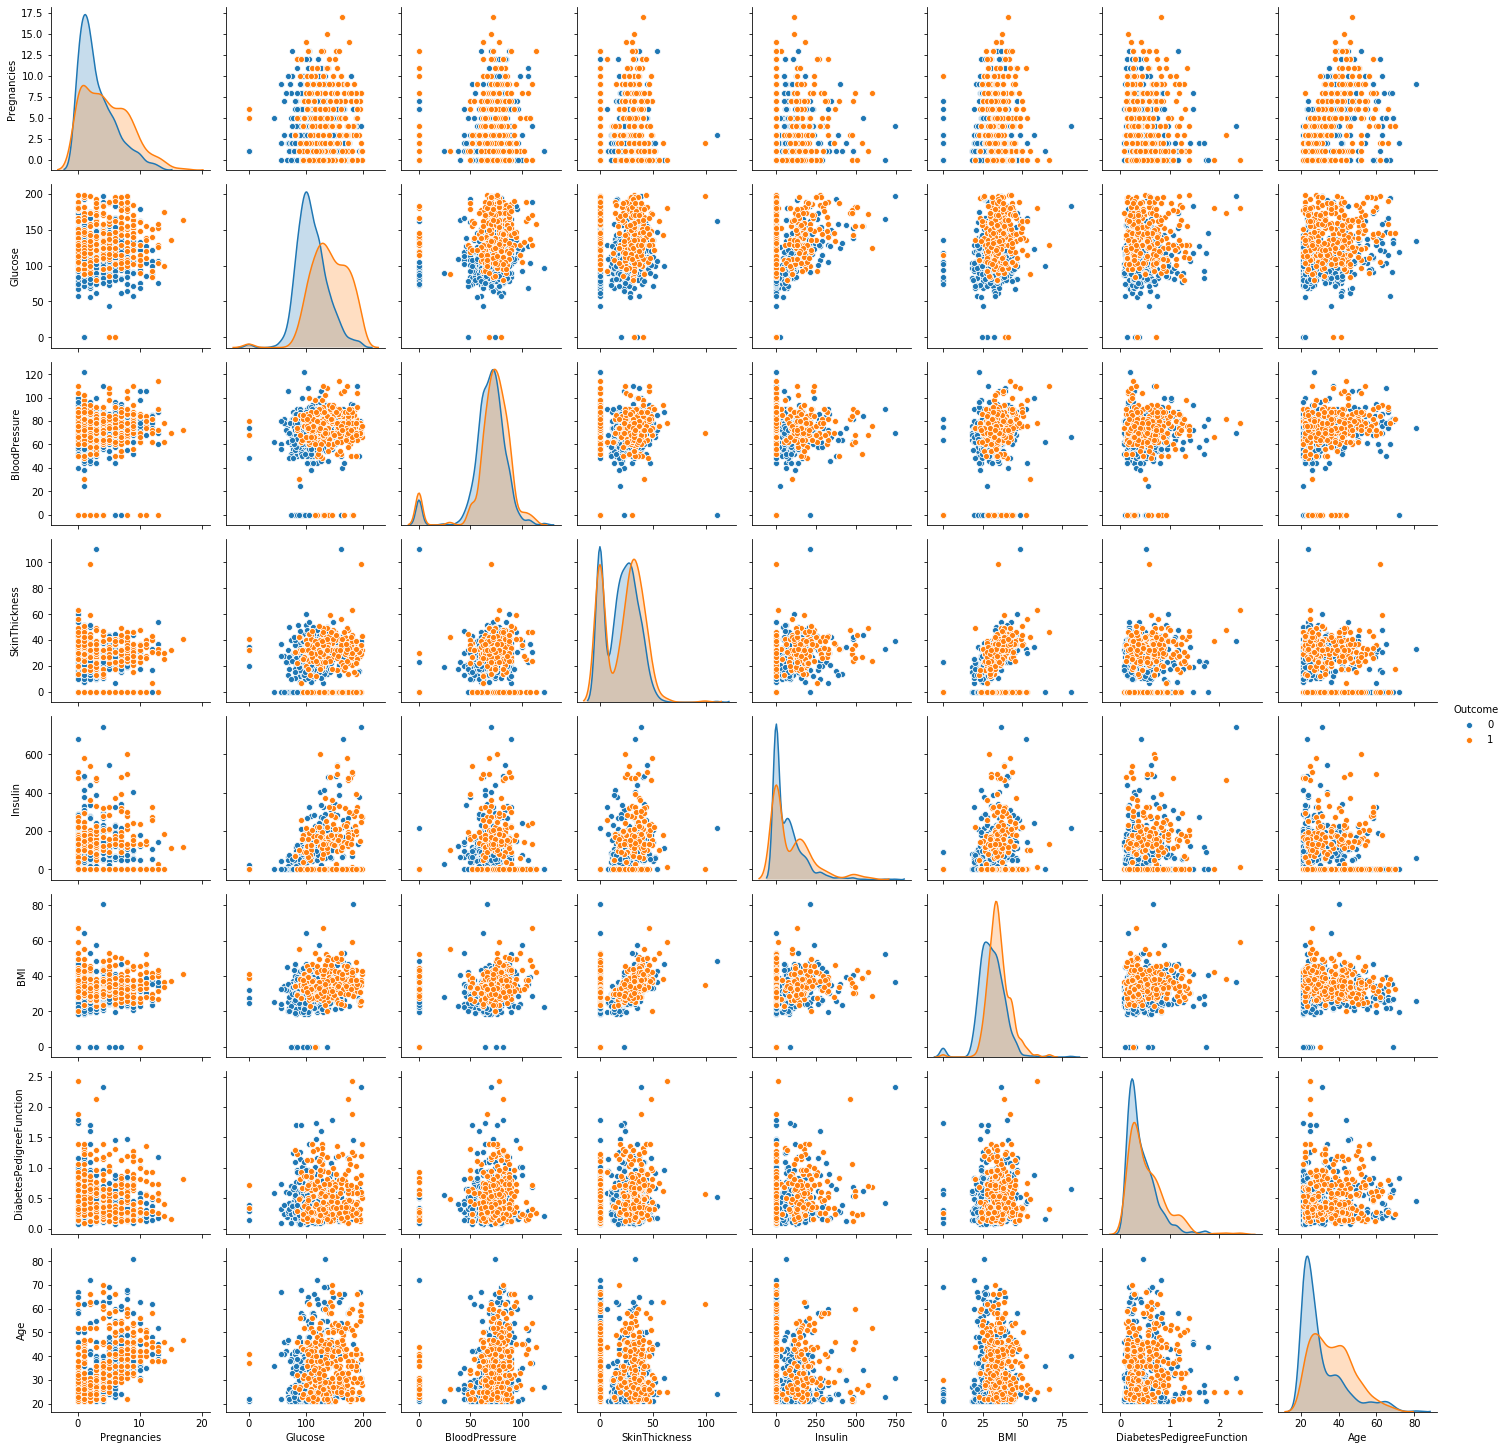

In [14]:
sns.pairplot(data, hue= 'Outcome')
plt.show()

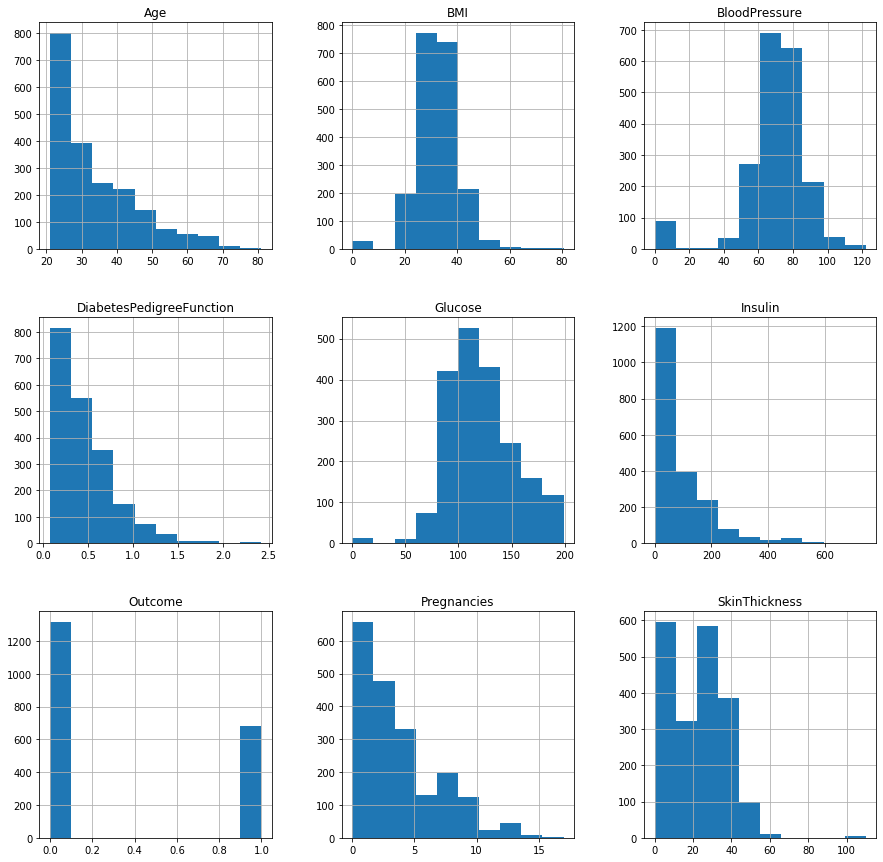

In [12]:
data.hist(figsize= (15,15))
plt.show()

* Skewness - Data between -0.5 and 0.5 then -- symmetrical (no skew)
*            Data between -1 and -0.5 then right skewd | if in between 0.5 and 1 then left skewd
*            Data less than -1 or greater than 1 considered to be highly skewd 

In [16]:
# To check the skewness in each attribute in the data
data.skew(axis = 0)

Pregnancies                 0.982366
Glucose                     0.158806
BloodPressure              -1.854476
SkinThickness               0.207228
Insulin                     1.996084
BMI                        -0.090455
DiabetesPedigreeFunction    1.811979
Age                         1.181267
Outcome                     0.666633
dtype: float64

In [27]:
data.isin([0]).sum()

Pregnancies                  301
Glucose                       13
BloodPressure                 90
SkinThickness                573
Insulin                      956
BMI                           28
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

In [28]:
data[data.Pregnancies == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
5,0,173,78,32,265,46.5,1.159,58,0
24,0,180,90,26,90,36.5,0.314,35,1
...,...,...,...,...,...,...,...,...,...
1959,0,129,80,0,0,31.2,0.703,29,0
1966,0,102,75,23,0,0.0,0.572,21,0
1983,0,114,80,34,285,44.2,0.167,27,0
1985,0,131,88,0,0,31.6,0.743,32,1


In [29]:
data.isin([np.NaN]).any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [31]:
# Replacing the 0 values from ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] by NaN
df_copy = data.copy(deep=True)
df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df_copy.isnull().sum()

Pregnancies                   0
Glucose                      13
BloodPressure                90
SkinThickness               573
Insulin                     956
BMI                          28
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [32]:
# Replacing NaN value by mean, median depending upon distribution

attributes = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

for i in attributes:
    if i in ['Glucose','BloodPressure']:
        df_copy[i].fillna(df_copy[i].mean(), inplace = True)
    else :
        df_copy[i].fillna(df_copy[i].median(), inplace = True)
        
# check for NaN values 
df_copy.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

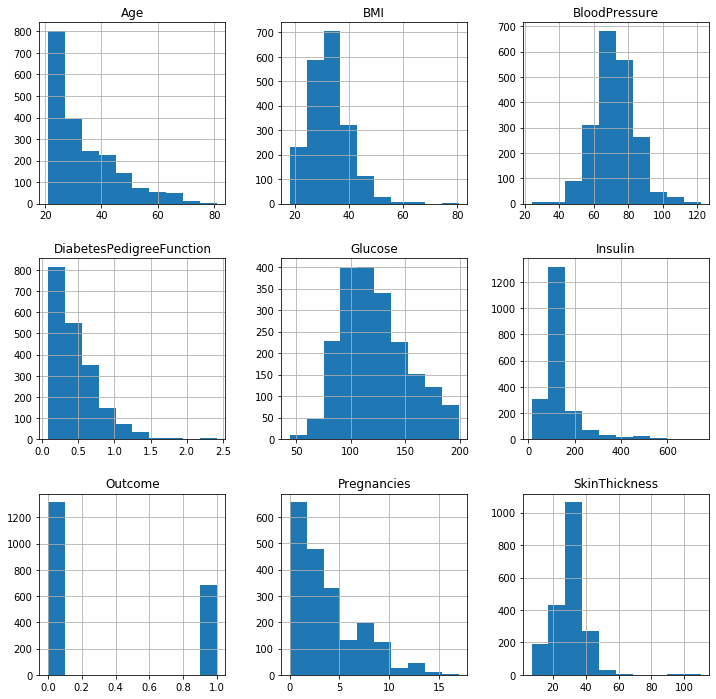

In [33]:
df_copy.hist(figsize=(12,12))
plt.show()

### Model Building Process
- split the attributes and lables 

In [36]:
X = df_copy.iloc[:, :-1].values
y = df_copy.iloc[:, -1].values 

- split the data into train and test

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 125)

- scaling data

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [42]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

C:\Users\LOKESH\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\LOKESH\anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [43]:
# Creating a function to calculate best model for this problem
def find_best_model(X, y):
    models = {
        'logistic_regression': {
            'model': LogisticRegression(solver='lbfgs', multi_class='auto'),
            'parameters': {
                'C': [1,5,10]
               }
        },
        
        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [5,10]
            }
        },
        
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [10,15,20,50,100,200]
            }
        },
        
        'svm': {
            'model': SVC(gamma='auto'),
            'parameters': {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }
        }

    }
    
    scores = [] 
    cv_shuffle = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv = cv_shuffle, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'score': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model','best_parameters','score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,logistic_regression,{'C': 1},0.770625
1,decision_tree,"{'criterion': 'gini', 'max_depth': 10}",0.888750
2,random_forest,{'n_estimators': 100},0.953750
3,svm,"{'C': 20, 'kernel': 'rbf'}",0.851250


*Note: Since the Random Forest algorithm has the highest accuracy, we futher fine tune the model using hyperparameter optimization.*

In [45]:
from sklearn.model_selection import cross_val_score
for i in [5,10]:
    CV_score = cross_val_score(estimator= RandomForestClassifier(n_estimators = 100, random_state = 0), X = X_train,y = y_train, cv = 5 )
    print('CV score: {} for cv = {}'.format(CV_score, i))

CV score: [0.9625   0.94375  0.959375 0.971875 0.928125] for cv = 5
CV score: [0.9625   0.94375  0.959375 0.971875 0.928125] for cv = 10


*Note : Since the cross validation score for folds = 5 and 10 yeilds to same results*

- Best model is Randonforest with 100 estimators 

In [47]:
classifier = RandomForestClassifier(n_estimators= 100, random_state= 0, n_jobs= -1)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

### Wait! lets do PCA and check for attributes pattern

In [86]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X = pca.fit_transform(X)

In [87]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.89745393, 0.10254607])

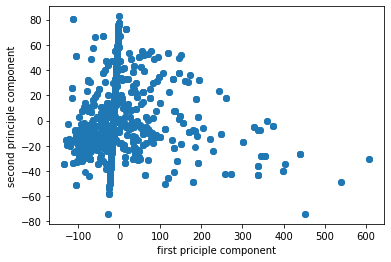

In [92]:
plt.scatter(x = X[:, 0], y= X[:, 1])
plt.xlabel('first priciple component')
plt.ylabel('second principle component')
plt.show()

*Note : By transforming data into 2 dimentions using PCA we can conclude that, plot shows non linear pattern so linear models won't work well. Choice of randomforest leads to better results*

## Model Evaluation

In [48]:
print("training score: {} and test score: {} ".format(classifier.score(X_train, y_train), classifier.score(X_test, y_test)))

training score: 1.0 and test score: 0.9875 


In [50]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score
cm = confusion_matrix(y_test, y_pred)
cm

array([[278,   5],
       [  0, 117]], dtype=int64)

In [59]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       283
           1       0.96      1.00      0.98       117

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [62]:
print(accuracy_score(y_test, y_pred))

0.9875


## ROC Curve

In [67]:
from sklearn.metrics import roc_auc_score, roc_curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:, 1])

In [69]:
roc_score = roc_auc_score(y_test, y_pred)
roc_score

0.9911660777385158

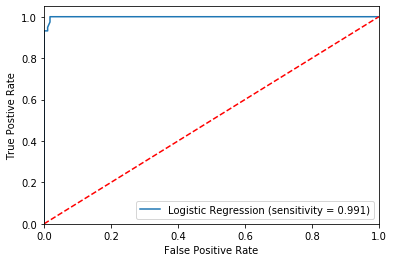

In [70]:
# roc curve
plt.figure()
plt.plot(fpr, tpr, label = 'Logistic Regression (sensitivity = %0.3f)' %roc_score)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.legend(loc = 'lower right')
plt.show()

## Predictions

In [73]:
# Creating a function for prediction
def predict_diabetes(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age):
    preg = int(Pregnancies)
    glucose = float(Glucose)
    bp = float(BloodPressure)
    st = float(SkinThickness)
    insulin = float(Insulin)
    bmi = float(BMI)
    DiabetesPedigreeFunction = float(DiabetesPedigreeFunction)
    age = int(Age)

    x = [[preg, glucose, bp, st, insulin, bmi, DiabetesPedigreeFunction, age]]
    x = sc.transform(x)

    return classifier.predict(x)

In [78]:
if predict_diabetes(1, 117, 88, 24, 145, 34.5, 0.403, 40)[0]:
    print("SORRY! STOP EATING SWEETS")
else:
    print("Congrats! still you can eat sweets")

SORRY! STOP EATING SWEETS


In [79]:
if predict_diabetes(2, 81, 72, 15, 76, 30.1, 0.547, 25)[0]:
    print("Sorry! STOP EATING SWEETS")
else:
    print("Congrats! still you can eat sweets")

Congrats! still you can eat sweets
